<a href="https://colab.research.google.com/github/Angel-Garcia02/PneumonIA/blob/main/PnuomonIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Base\ de\ datos\ -\ Neumonía

PnuomonIA.ipynb  test  train  val


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
train_dir = '/content/drive/MyDrive/Base de datos - Neumonía/train'
val_dir = '/content/drive/MyDrive/Base de datos - Neumonía/val'
test_dir = '/content/drive/MyDrive/Base de datos - Neumonía/test'

# Preprocesamiento de datos
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Carga de datos
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Ajusta según tus imágenes
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1580 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)  # Ajusta la tasa de aprendizaje aquí
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=6  # Ajusta según lo necesites
)


Epoch 1/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9781 - loss: 0.0709 - val_accuracy: 0.7143 - val_loss: 0.6470
Epoch 2/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9782 - loss: 0.0631 - val_accuracy: 0.7143 - val_loss: 0.6363
Epoch 3/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9807 - loss: 0.0591 - val_accuracy: 0.6429 - val_loss: 0.7947
Epoch 4/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9879 - loss: 0.0468 - val_accuracy: 0.6429 - val_loss: 0.6274
Epoch 5/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.9840 - loss: 0.0488 - val_accuracy: 0.7857 - val_loss: 0.5151
Epoch 6/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9940 - loss: 0.0333 - val_accuracy: 0.7857 - val_loss: 0.6174


In [ ]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_data)
print(f"Precisión en test: {test_acc:.2f}")

Found 257 images belonging to 2 classes.
9/9 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.5877 - loss: 1.1168
Precisión en test: 0.62


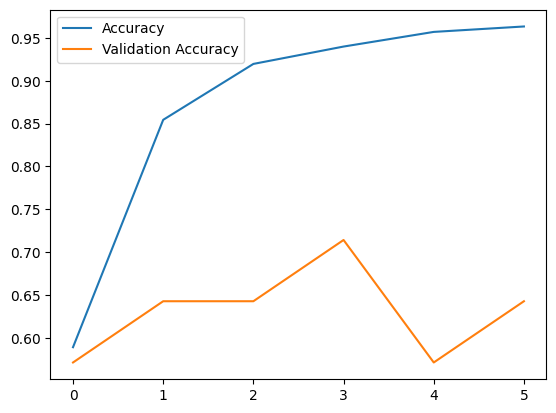

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Imagen-1-N.jpg to Imagen-1-N.jpg


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Carga y preprocesa la imagen
img_path = 'Imagen-1-N.jpg'  # Reemplaza con el nombre de tu imagen cargada
img = load_img(img_path, target_size=(150, 150))  # Redimensiona la imagen
img_array = img_to_array(img)  # Convierte a array
img_array = img_array / 255.0  # Normaliza
img_array = np.expand_dims(img_array, axis=0)  # Añade una dimensión para batch


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


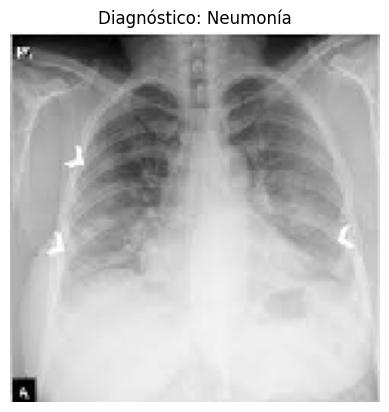

In [ ]:
# Predicción
prediction = model.predict(img_array)

# Interpreta el resultado
if prediction[0] > 0.5:  # Ajusta el umbral según tu modelo
    plt.imshow(img)
    plt.title("Diagnóstico: Neumonía")
    plt.axis('off')
    plt.show()
else:
    plt.imshow(img)
    plt.title("Diagnóstico: Normal")
    plt.axis('off')
    plt.show()
